<a href="https://colab.research.google.com/github/samcab28/Analisis-Algoritmos/blob/master/IA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Inteligencia Artificial

Estudiantes:

*   Cabrera Tabash Samir
*   Mesen Alvarado Pablo
*   Urbina Salazar Luis



## Instalacion de dependencias y utilidades

## Recopilacion y descarga de datos


### Metodos de Acceso


In [1]:
# Instalar kagglehub si no está instalado
!pip install kagglehub -q

# Importar y descargar dataset
import kagglehub
import shutil

# Descargar dataset
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Ruta de descarga original:", path)

# Moverlo a /content
destino = "/content/chronic_kidney_disease_dataset"

shutil.copytree(path, destino, dirs_exist_ok=True)

print(f"Dataset disponible en: {destino}")


100%|██████████| 473k/473k [00:00<00:00, 39.9MB/s]

Extracting files...
Ruta de descarga original: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Dataset disponible en: /content/chronic_kidney_disease_dataset


## Fase preparacion de datos

### Descripcion de datos


In [54]:
import pandas as pd
import numpy as np

# Reemplaza con la ruta a tu CSV
df = pd.read_csv("/content/chronic_kidney_disease_dataset/Chronic_Kidney_Dsease_data.csv")


In [55]:
print("Breve descripción del dataset y comprobación de funcionamiento de pandas.")

df.head()      # Muestra las primeras 5 filas
df.head(10)    # Muestra las primeras 10 filas
df.tail()      # Muestra las últimas 5 filas


Breve descripción del dataset y comprobación de funcionamiento de pandas.


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [4]:
print("Informacion basica de la data")
print("Registros:", df.shape[0], "Variables:", df.shape[1])
print(df.dtypes)

Informacion basica de la data
Registros: 1659 Variables: 54
PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float

In [5]:
print("Busqueda de valores faltantes en el dataset")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print(missing_report.sort_values("missing_pct", ascending=False))

Busqueda de valores faltantes en el dataset
                               missing_count  missing_pct
PatientID                                  0          0.0
Age                                        0          0.0
Gender                                     0          0.0
Ethnicity                                  0          0.0
SocioeconomicStatus                        0          0.0
EducationLevel                             0          0.0
BMI                                        0          0.0
Smoking                                    0          0.0
AlcoholConsumption                         0          0.0
PhysicalActivity                           0          0.0
DietQuality                                0          0.0
SleepQuality                               0          0.0
FamilyHistoryKidneyDisease                 0          0.0
FamilyHistoryHypertension                  0          0.0
FamilyHistoryDiabetes                      0          0.0
PreviousAcuteKidneyInjury   

In [6]:
print("Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID")
dups = df.duplicated().sum()
print("Duplicados exactos:", dups)
# revisar duplicados por PatientID
if "PatientID" in df.columns:
    print("Duplicados por PatientID:", df["PatientID"].duplicated().sum())

Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID
Duplicados exactos: 0
Duplicados por PatientID: 0


In [7]:
print("Resumen Estadistico Basico de los datos")
desc = df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
                                count        mean         std         min  \
PatientID                      1659.0  830.000000  479.056364    1.000000   
Age                            1659.0   54.441230   20.549757   20.000000   
Gender                         1659.0    0.515371    0.499914    0.000000   
Ethnicity                      1659.0    0.713080    1.000430    0.000000   
SocioeconomicStatus            1659.0    0.977697    0.776686    0.000000   
EducationLevel                 1659.0    1.693189    0.910611    0.000000   
BMI                            1659.0   27.620049    7.288670   15.033888   
Smoking                        1659.0    0.292948    0.455252    0.000000   
AlcoholConsumption             1659.0    9.969831    5.798787    0.021740   
PhysicalActivity               1659.0    5.024247    2.866274    0.001186   
DietQuality                    1659.0    5.028544    2.865777    0.002407   
SleepQuality                   1659.

In [8]:
print("Rangos esperados en los datos")
expected_ranges = {
    "Age": (0,120),
    "BMI": (10,60),
    "SystolicBP": (50,250),
    "DiastolicBP": (30,150),
    "SerumCreatinine": (0.1,10),
    "GFR": (0,200),
    "HbA1c": (3.0,15.0),
    "FastingBloodSugar": (30,400),
    "ProteinInUrine": (0,100),
    "ACR": (0,1000),
}
out_of_range = {}
for col,(low,high) in expected_ranges.items():
    if col in df.columns:
        vio = df[(df[col] < low) | (df[col] > high)]
        out_of_range[col] = len(vio)
print("Valores fuera de rango por variable:", out_of_range)

Rangos esperados en los datos
Valores fuera de rango por variable: {'Age': 0, 'BMI': 0, 'SystolicBP': 0, 'DiastolicBP': 0, 'SerumCreatinine': 0, 'GFR': 0, 'HbA1c': 0, 'FastingBloodSugar': 0, 'ProteinInUrine': 0, 'ACR': 0}


In [9]:
print("Deteccion de outliers en la data")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_outliers = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    iqr_outliers[col] = n_out
# Mostrar variables con mayor número de outliers
iqr_series = pd.Series(iqr_outliers).sort_values(ascending=False)
print("Outliers (IQR) por variable (top 20):")
print(iqr_series.head(20))

Deteccion de outliers en la data
Outliers (IQR) por variable (top 20):
UrinaryTractInfections           349
AntidiabeticMedications          336
Edema                            335
WaterQuality                     327
FamilyHistoryKidneyDisease       234
PreviousAcuteKidneyInjury        175
OccupationalExposureChemicals    171
Ethnicity                        162
Diagnosis                        135
HeavyMetalsExposure               73
Gender                             0
SocioeconomicStatus                0
BMI                                0
SleepQuality                       0
DietQuality                        0
Age                                0
EducationLevel                     0
AlcoholConsumption                 0
PhysicalActivity                   0
Smoking                            0
dtype: int64


In [10]:
print("correlacion entre variables clinicas")
clinicals = ["SerumCreatinine","GFR","BUNLevels","ProteinInUrine","ACR","HbA1c","HemoglobinLevels","SystolicBP"]
present = [c for c in clinicals if c in df.columns]
corr = df[present].corr()
print("Matriz de correlación (muestra):")
print(corr)

correlacion entre variables clinicas
Matriz de correlación (muestra):
                  SerumCreatinine       GFR  BUNLevels  ProteinInUrine  \
SerumCreatinine          1.000000 -0.003434   0.022555       -0.037101   
GFR                     -0.003434  1.000000  -0.036221       -0.009442   
BUNLevels                0.022555 -0.036221   1.000000       -0.000365   
ProteinInUrine          -0.037101 -0.009442  -0.000365        1.000000   
ACR                     -0.001899 -0.008342   0.011626       -0.014503   
HbA1c                   -0.035630 -0.038573   0.010360       -0.019301   
HemoglobinLevels        -0.003282 -0.019169   0.012472       -0.001390   
SystolicBP              -0.018829  0.009462   0.021084       -0.012435   

                       ACR     HbA1c  HemoglobinLevels  SystolicBP  
SerumCreatinine  -0.001899 -0.035630         -0.003282   -0.018829  
GFR              -0.008342 -0.038573         -0.019169    0.009462  
BUNLevels         0.011626  0.010360          0.012472  

### Limpieza datos

In [122]:
# ==== PREPROCESAMIENTO GENERAL PARA AMBOS MODELOS ====

import pandas as pd
import numpy as np

df_clean = df.copy()

# 1. Eliminar variables no predictivas
df_clean = df_clean.drop(columns=["PatientID", "DoctorInCharge"])

# 2. Codificación one-hot SOLO en variables categóricas discretas
categorical_vars = ["Ethnicity", "SocioeconomicStatus", "EducationLevel"]
df_clean = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)

# 3. Transformación logarítmica SOLO en variables muy sesgadas
log_vars = ["SerumCreatinine", "BUNLevels", "ACR", "CholesterolTriglycerides"]
for var in log_vars:
    df_clean[f"log_{var}"] = np.log1p(df_clean[var])

# 4. Imputación muy suave por si hubiera NaNs
df_clean = df_clean.fillna(df_clean.median())

In [124]:
df_clean["Diagnosis"].value_counts()


,count
Diagnosis,
1,1524
0,135


In [106]:
# Celda 0: Preparar X (features) e y (target)
X = df_clean.drop('Diagnosis', axis=1)  # Todas las columnas excepto Diagnosis
y = df_clean['Diagnosis']  # Solo la columna objetivo

print(f"✅ Dataset preparado:")
print(f"Features (X): {X.shape[0]} filas x {X.shape[1]} columnas")
print(f"Target (y): {y.shape[0]} valores")
print(f"\n📊 Distribución de clases:")
print(y.value_counts().sort_index())

✅ Dataset preparado:
Features (X): 1659 filas x 51 columnas
Target (y): 1659 valores

📊 Distribución de clases:
Diagnosis
0     135
1    1524
Name: count, dtype: int64


In [107]:
# Celda 1: División train/test con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Mantiene proporción de clases
    random_state=42
)

print(f"📊 Train: {len(X_train)} | Test: {len(X_test)}")
print(f"Train - Clase 0: {sum(y_train==0)} | Clase 1: {sum(y_train==1)}")
print(f"Test  - Clase 0: {sum(y_test==0)} | Clase 1: {sum(y_test==1)}")

📊 Train: 1327 | Test: 332
Train - Clase 0: 108 | Clase 1: 1219
Test  - Clase 0: 27 | Clase 1: 305


In [108]:
# Verificar que NO hay duplicados entre train y test
train_indices = set(X_train.index)
test_indices = set(X_test.index)

overlap = train_indices.intersection(test_indices)

print(f"🔍 Índices en train: {len(train_indices)}")
print(f"🔍 Índices en test: {len(test_indices)}")
print(f"⚠️ Índices repetidos: {len(overlap)}")  # Debe ser 0
print(f"✅ Total único: {len(train_indices) + len(test_indices)}")  # Debe ser 1659

🔍 Índices en train: 1327
🔍 Índices en test: 332
⚠️ Índices repetidos: 0
✅ Total único: 1659


In [109]:
# Celda 2: Verificar desbalance original
import pandas as pd

print("🔍 Distribución ANTES del balanceo:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\n📈 Ratio: {sum(y_train==0) / sum(y_train==1):.2%}")

🔍 Distribución ANTES del balanceo:
Diagnosis
0     108
1    1219
Name: count, dtype: int64

📈 Ratio: 8.86%


In [110]:
# Celda 3: SMOTE con ratio 1:2 (recomendado)
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=42)  # Clase 0 = 50% de Clase 1
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("✅ SMOTE aplicado (ratio 1:2)")
print(pd.Series(y_train_smote).value_counts().sort_index())
print(f"📈 Nuevo ratio: {sum(y_train_smote==0) / sum(y_train_smote==1):.2%}")

✅ SMOTE aplicado (ratio 1:2)
Diagnosis
0     609
1    1219
Name: count, dtype: int64
📈 Nuevo ratio: 49.96%


In [115]:
# Prueba SMOTEENN con parámetros más conservadores
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

smenn = SMOTEENN(
    sampling_strategy=0.8,  # No balance perfecto
    enn=EditedNearestNeighbours(n_neighbors=5),  # Más conservador
    random_state=42
)

X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

print("⭐ SMOTEENN aplicado (balance + limpieza)")
print(pd.Series(y_train_smenn).value_counts().sort_index())
print(f"📉 Muestras eliminadas: {len(X_train) - len(X_train_smenn)}")

⭐ SMOTEENN aplicado (balance + limpieza)
Diagnosis
0    975
1    546
Name: count, dtype: int64
📉 Muestras eliminadas: -194


In [112]:
# Celda 5: Class weights (para usar con modelo)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print("⚖️ Pesos calculados para el modelo:")
print(f"Clase 0: {weights[0]:.2f} | Clase 1: {weights[1]:.2f}")

⚖️ Pesos calculados para el modelo:
Clase 0: 6.14 | Clase 1: 0.54


In [116]:
# Comparación completa
import pandas as pd

print("📊 RESUMEN DE CONJUNTOS:\n")

print("🔹 Original (train):")
print(pd.Series(y_train).value_counts())

print("\n🔹 SMOTE (ratio 1:2):")
print(pd.Series(y_train_smote).value_counts())

print("\n🔹 SMOTEENN (balance + limpieza):")
print(pd.Series(y_train_smenn).value_counts())

print("\n⚖️ Pesos por clase:")
print(f"Clase 0: {class_weight[0]:.2f}x más importante")
print(f"Clase 1: {class_weight[1]:.2f}x más importante")

📊 RESUMEN DE CONJUNTOS:

🔹 Original (train):
Diagnosis
1    1219
0     108
Name: count, dtype: int64

🔹 SMOTE (ratio 1:2):
Diagnosis
1    1219
0     609
Name: count, dtype: int64

🔹 SMOTEENN (balance + limpieza):
Diagnosis
0    975
1    546
Name: count, dtype: int64

⚖️ Pesos por clase:
Clase 0: 6.14x más importante
Clase 1: 0.54x más importante


## Modelado de algoritmos

### Regresion 1

In [118]:
# Celda 1: Preparar datos para Regresión GFR
features_gfr = ['SerumCreatinine', 'Age', 'BUNLevels', 'ProteinInUrine',
                'SystolicBP', 'HbA1c', 'BMI']

X_gfr = df_clean[features_gfr]
y_gfr = df_clean['GFR']

print("📊 Dataset Regresión GFR")
print(f"Features: {X_gfr.shape[1]} variables | Muestras: {X_gfr.shape[0]}")
print(f"\n📈 Estadísticas GFR (objetivo):")
print(y_gfr.describe())

📊 Dataset Regresión GFR
Features: 7 variables | Muestras: 1659

📈 Estadísticas GFR (objetivo):
count    1659.000000
mean       66.829202
std        30.050836
min        15.107850
25%        41.149324
50%        66.555207
75%        92.388269
max       119.920261
Name: GFR, dtype: float64


In [119]:
# Celda 2: División train/test y entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# División 80/20
X_train_gfr, X_test_gfr, y_train_gfr, y_test_gfr = train_test_split(
    X_gfr, y_gfr, test_size=0.2, random_state=42
)

# Entrenar modelo
modelo_gfr = LinearRegression()
modelo_gfr.fit(X_train_gfr, y_train_gfr)

# Predicciones
y_pred_train = modelo_gfr.predict(X_train_gfr)
y_pred_test = modelo_gfr.predict(X_test_gfr)

# Métricas
print("🎯 RESULTADOS REGRESIÓN GFR\n")
print("📚 TRAIN:")
print(f"  R²: {r2_score(y_train_gfr, y_pred_train):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_gfr, y_pred_train):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_gfr, y_pred_train)):.2f}")

print("\n🧪 TEST:")
print(f"  R²: {r2_score(y_test_gfr, y_pred_test):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_gfr, y_pred_test):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_gfr, y_pred_test)):.2f}")

🎯 RESULTADOS REGRESIÓN GFR

📚 TRAIN:
  R²: 0.0051
  MAE: 26.14
  RMSE: 30.17

🧪 TEST:
  R²: -0.0199
  MAE: 25.24
  RMSE: 29.23


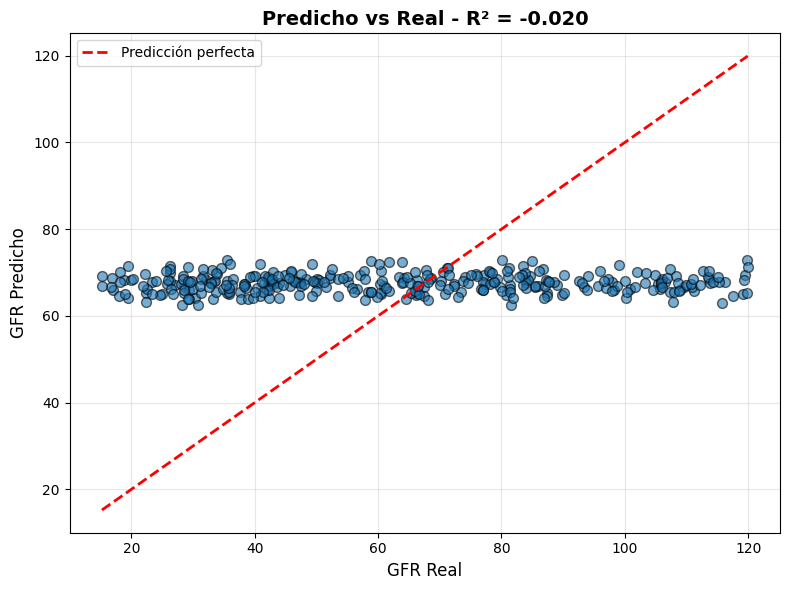

In [120]:
# Celda 3: Gráfica 1 - Predicho vs Real
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Scatter plot
ax.scatter(y_test_gfr, y_pred_test, alpha=0.6, edgecolors='k', s=50)
ax.plot([y_test_gfr.min(), y_test_gfr.max()],
        [y_test_gfr.min(), y_test_gfr.max()],
        'r--', lw=2, label='Predicción perfecta')

ax.set_xlabel('GFR Real', fontsize=12)
ax.set_ylabel('GFR Predicho', fontsize=12)
ax.set_title(f'Predicho vs Real - R² = {r2_score(y_test_gfr, y_pred_test):.3f}',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

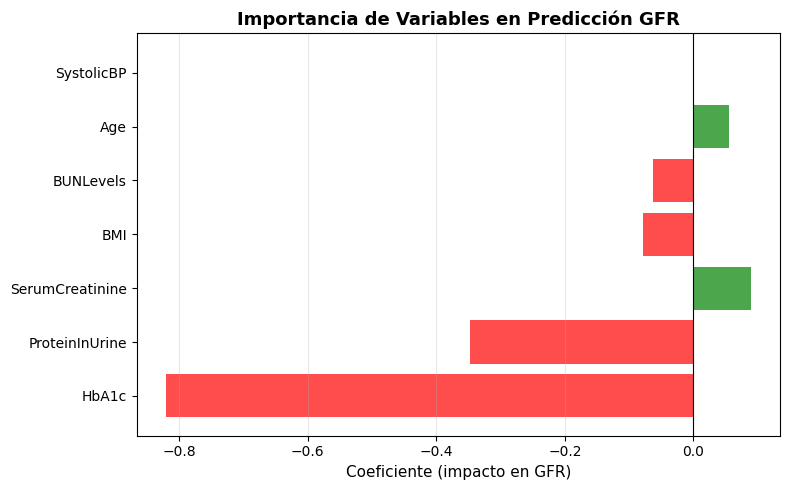


📊 Coeficientes:
       Variable  Coeficiente
          HbA1c    -0.820602
 ProteinInUrine    -0.347652
SerumCreatinine     0.089213
            BMI    -0.078705
      BUNLevels    -0.062883
            Age     0.055290
     SystolicBP    -0.000516


In [121]:
# Celda 4: Gráfica 2 - Importancia de variables
importancias = pd.DataFrame({
    'Variable': features_gfr,
    'Coeficiente': modelo_gfr.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

colores = ['red' if x < 0 else 'green' for x in importancias['Coeficiente']]
ax.barh(importancias['Variable'], importancias['Coeficiente'], color=colores, alpha=0.7)

ax.set_xlabel('Coeficiente (impacto en GFR)', fontsize=11)
ax.set_title('Importancia de Variables en Predicción GFR', fontsize=13, fontweight='bold')
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Coeficientes:")
print(importancias.to_string(index=False))